In [1]:
import pandas as pd
import numpy as np

Load and show the dataframe shape.

In [2]:
customer_data = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')
customer_data = customer_data.drop(['Unnamed: 0'], axis=1)
display(customer_data)
print('Df shape:', customer_data.shape)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


Df shape: (10910, 25)


Standardize header names.

In [3]:
def standardize_data (df):
    df.columns = list(map(lambda x: x.lower(), df.columns))
    df.columns = list(map(lambda x: x.replace(" ", "_"), df.columns))
    df.rename(columns = {'employmentstatus': 'employment_status'}, inplace = True)
    return df

print('Before standardization:\n', customer_data.columns)
customer_data = standardize_data(customer_data)
print('\nAfter standardization:\n', customer_data.columns)




Before standardization:
 Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Vehicle Type'],
      dtype='object')

After standardization:
 Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_c

Which columns are numerical?

In [4]:
print('Numerical cols are:', list(customer_data._get_numeric_data().columns))

Numerical cols are: ['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies', 'total_claim_amount']


Which columns are categorical?

In [5]:
print('Categorical cols are:', list(customer_data.select_dtypes(['object']).columns))

Categorical cols are: ['customer', 'state', 'response', 'coverage', 'education', 'effective_to_date', 'employment_status', 'gender', 'location_code', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size', 'vehicle_type']


Check and deal with NaN values.

In [6]:
# We can see that there're more than 600 nan values in customer_lifetime_value, response, months_since_last_claim,
# number_of_open_complaints, vehicle_class and vehicle_size columns. The number of nan values on vehicle_type col
# exceeds 5.000. Let's create a df in order to see it more clearly
nan_values = pd.DataFrame(round(customer_data.isna().sum()/len(customer_data),4)*100).reset_index()
nan_values.columns = ['header', 'percent_nulls']
nan_values = nan_values[nan_values['percent_nulls'] > 2]
display(nan_values)

,header,percent_nulls
1,state,5.78
3,response,5.78
13,months_since_last_claim,5.80
15,number_of_open_complaints,5.80
22,vehicle_class,5.70
23,vehicle_size,5.70
24,vehicle_type,50.25


In [7]:
# As none of the observations are less than 2%, we're going to use the fillna() function for the numeric columns with less than 40%
# nan values. For vehicle_type, we're going to drop the entire column as it contains more than 40% nan values. 
# Source: https://bit.ly/3z0Me6K
customer_data = customer_data.drop('vehicle_type', axis=1)
print(customer_data.columns)

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')


Most frequent value is: 0.0
Mean of number of open complaints is: 0.38425610586747105
Median of number of open complaints is: 0.0


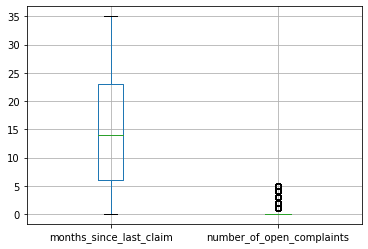

In [8]:
# Next step: fill missing values. Let's see if there are outliers with a boxplot for the numerical columns
nan_boxplot = customer_data.boxplot(column=['months_since_last_claim','number_of_open_complaints'])

# There are some outliers in the number_of_open_complaints column that will affect the mean.
most_freq_complaints = customer_data['number_of_open_complaints'].value_counts().idxmax()
print('Most frequent value is:', most_freq_complaints)
mean_complaints = np.mean(customer_data['number_of_open_complaints'])
print('Mean of number of open complaints is:', mean_complaints)
median_complaints = np.nanmedian(customer_data['number_of_open_complaints'])
print('Median of number of open complaints is:', median_complaints)

# Therefore, we're going to replace nan values with the most frequent value
customer_data['number_of_open_complaints'] = customer_data['number_of_open_complaints'] .fillna(most_freq_complaints)

In [9]:
# The months_since_last_claim column data does not present outliers, so we can replace the nan values with the mean
mean_months_claim = np.mean(customer_data['months_since_last_claim'])
print('Mean of months since last claim is:', mean_months_claim)
customer_data['months_since_last_claim'] = customer_data['months_since_last_claim'] .fillna(mean_months_claim)

Mean of months since last claim is: 15.149070740488469


In [10]:
# Now we need to handle the nan values present on categorial columns. As we don't have business knowledge domain and can't
# infer properties yet, we'll replace the nan values with "Unknown" category
customer_data['state'] = customer_data['state'].fillna("Unknown")
customer_data['response'] = customer_data['response'].fillna("Unknown")
customer_data['vehicle_class'] = customer_data['vehicle_class'].fillna("Unknown")
customer_data['vehicle_size'] = customer_data['vehicle_size'].fillna("Unknown")

In [11]:
# Do we still have nan values in our dataframe?
print(customer_data.isna().sum())

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64


Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.

In [14]:
# Function to extract month name from date and create
def get_month(df):
    df['month'] = pd.to_datetime(df['effective_to_date'], errors='coerce')
    months_list = [df['month'][i].strftime(format="%B") for i in range(len(df['month']))]
    return months_list
     
customer_data['month'] = get_month(customer_data)

# Dataframe filtered by first quarter data, althought there're already only values for January and February on the original df
customer_data[customer_data['month'].isin(['January', 'February'])]

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,February
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,January
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,February
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,January
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,0.0,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,0.0,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,January
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,January
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,February
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,February


BONUS: Put all the previously mentioned data transformations into a function.

In [13]:
bonus_df = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')
bonus_df = bonus_df.drop(['Unnamed: 0'], axis=1)

def clean_df(df):   
    
    # In this exercise, we define a function to handle nan values more quickly than before
    def identify_nan(df):
        nan_list = df.isnull().sum()
        drop_col = [i for i,v in nan_list.items() if (v/len(df)) > 0.40]
        fillna = [i for i,v in nan_list.items() if ((v/len(df)) > 0.02 and (v/len(df)) < 0.40)]
        for col in fillna:
            if (col == 'number_of_open_complaints'):
                median_oc = df[col].value_counts().idxmax() #Replacing nan by most frequent value
                df[col] = df[col].fillna(median_oc)
            elif (col == 'months_since_last_claim'):
                median_lc = df[col].value_counts().idxmax() #Replacing nan by most frequent value
                df[col] = df[col].fillna(median_lc)
            else:
                df[col] = df[col].fillna('Unknown')
        df = df.drop(drop_col, axis=1)
        return df
    
    #Apply functions
    headers_standard = standardize_data(df)
    print('Categorical cols are {} and numerical cols are {}:'.
          format(list(df.select_dtypes(['object']).columns),
                 list(df._get_numeric_data().columns)))
    no_nan = identify_nan(headers_standard)
    df['month'] = get_month(no_nan)
    df_filtered = df[df['month'].isin(['January', 'February'])]
    return df_filtered


bonus_solution = clean_df(bonus_df)
display(bonus_solution)

Categorical cols are ['customer', 'state', 'response', 'coverage', 'education', 'effective_to_date', 'employment_status', 'gender', 'location_code', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size', 'vehicle_type'] and numerical cols are ['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies', 'total_claim_amount']:


,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,February
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,January
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,February
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,January
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,January
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,January
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN,February
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,February
